In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
from TESSCroMo.tesscromo import TESSTargetPixelModeler

In [3]:
search_result = lk.search_targetpixelfile('Kepler-10', mission='TESS', )
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,377780790,0.0
1,TESS Sector 14,2019,TESS-SPOC,1800,377780790,0.0
2,TESS Sector 15,2019,TESS-SPOC,1800,377780790,0.0
3,TESS Sector 26,2020,TESS-SPOC,1800,377780790,0.0
4,TESS Sector 40,2021,SPOC,20,377780790,0.0
5,TESS Sector 40,2021,SPOC,120,377780790,0.0
...,...,...,...,...,...,...
12,TESS Sector 53,2022,TESS-SPOC,600,377780790,0.0
13,TESS Sector 54,2022,SPOC,20,377780790,0.0


In [4]:
tpf = search_result[17].download()

In [5]:
TESSCrowd = TESSTargetPixelModeler(tpf)

In [6]:
dx, dy = TESSCrowd.estimate_offset()
tpfmodel, w1,w2 = TESSCrowd.fit_tpf_model( use_err=True, dx=dx, dy=dy)

/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:331: RuntimeWarning: invalid value encountered in sqrt
  tpf_source_snr = source_tpf / np.sqrt(source_tpf+contam_tpf+bkg_tpf)
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:336: RuntimeWarning: invalid value encountered in sqrt
  bkg_aperture = (bkg_tpf / np.sqrt(source_tpf+contam_tpf+bkg_tpf)) >1


(<AxesSubplot:title={'center':'Median TPF'}>,
 <AxesSubplot:title={'center':'Model TPF'}>,
 <AxesSubplot:title={'center':'Model$-$Data'}>)

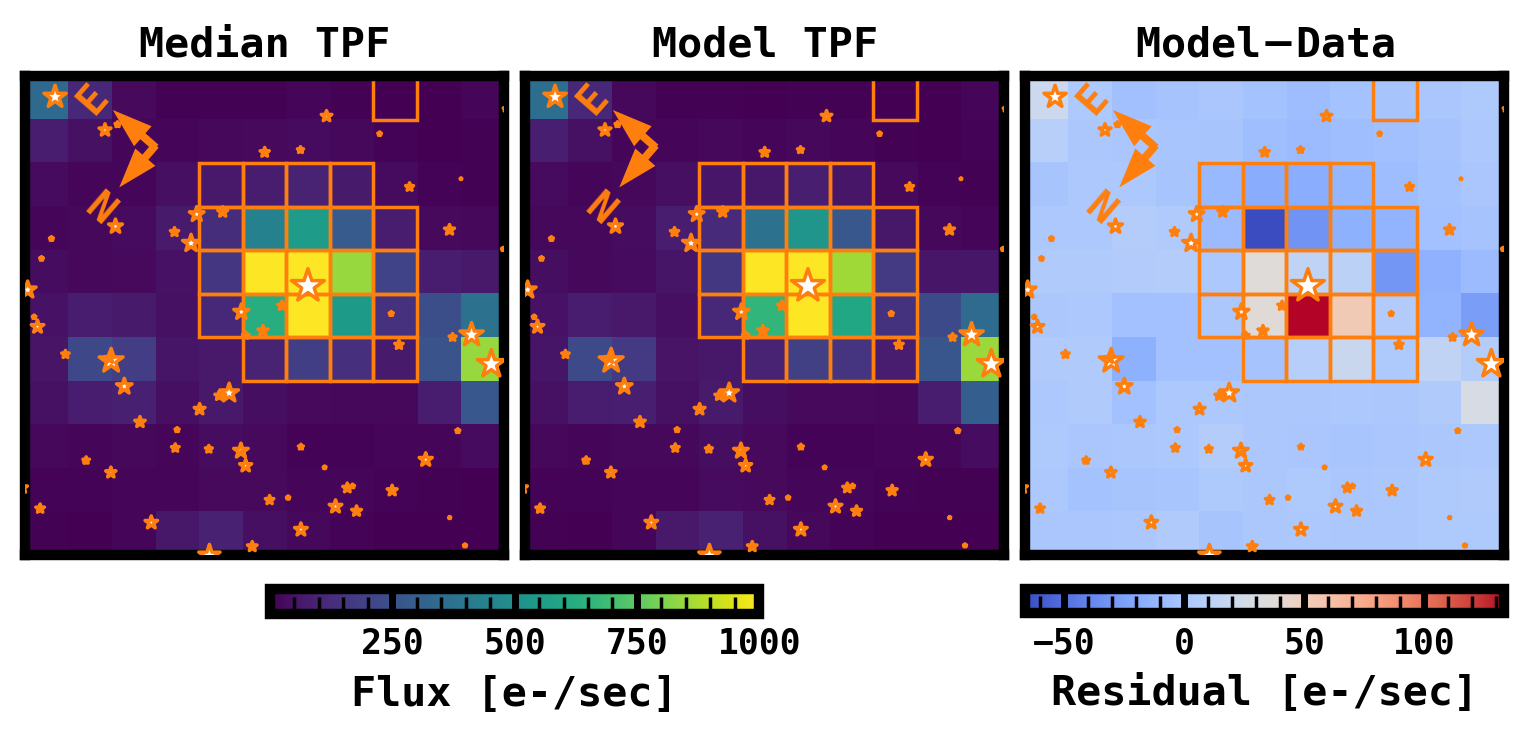

In [7]:
TESSCrowd.plot_tpf_model(logscale=False, vmax=1e3)

In [8]:
TESSCrowd.get_contamination_ratio(aperture=tpf.pipeline_mask)

{'crowdsap': 0.0187711672326281,
 'flfrcsap': 0.9812288327673719,
 'dilution': 1.0191302646291869,
 'med_tpf_bkg_aperture_flux': -93.05857647463054,
 'tess_zeropoint_mag': 20.3403201418527}

Text(0.5, 1.0, 'CroMo Aperture')

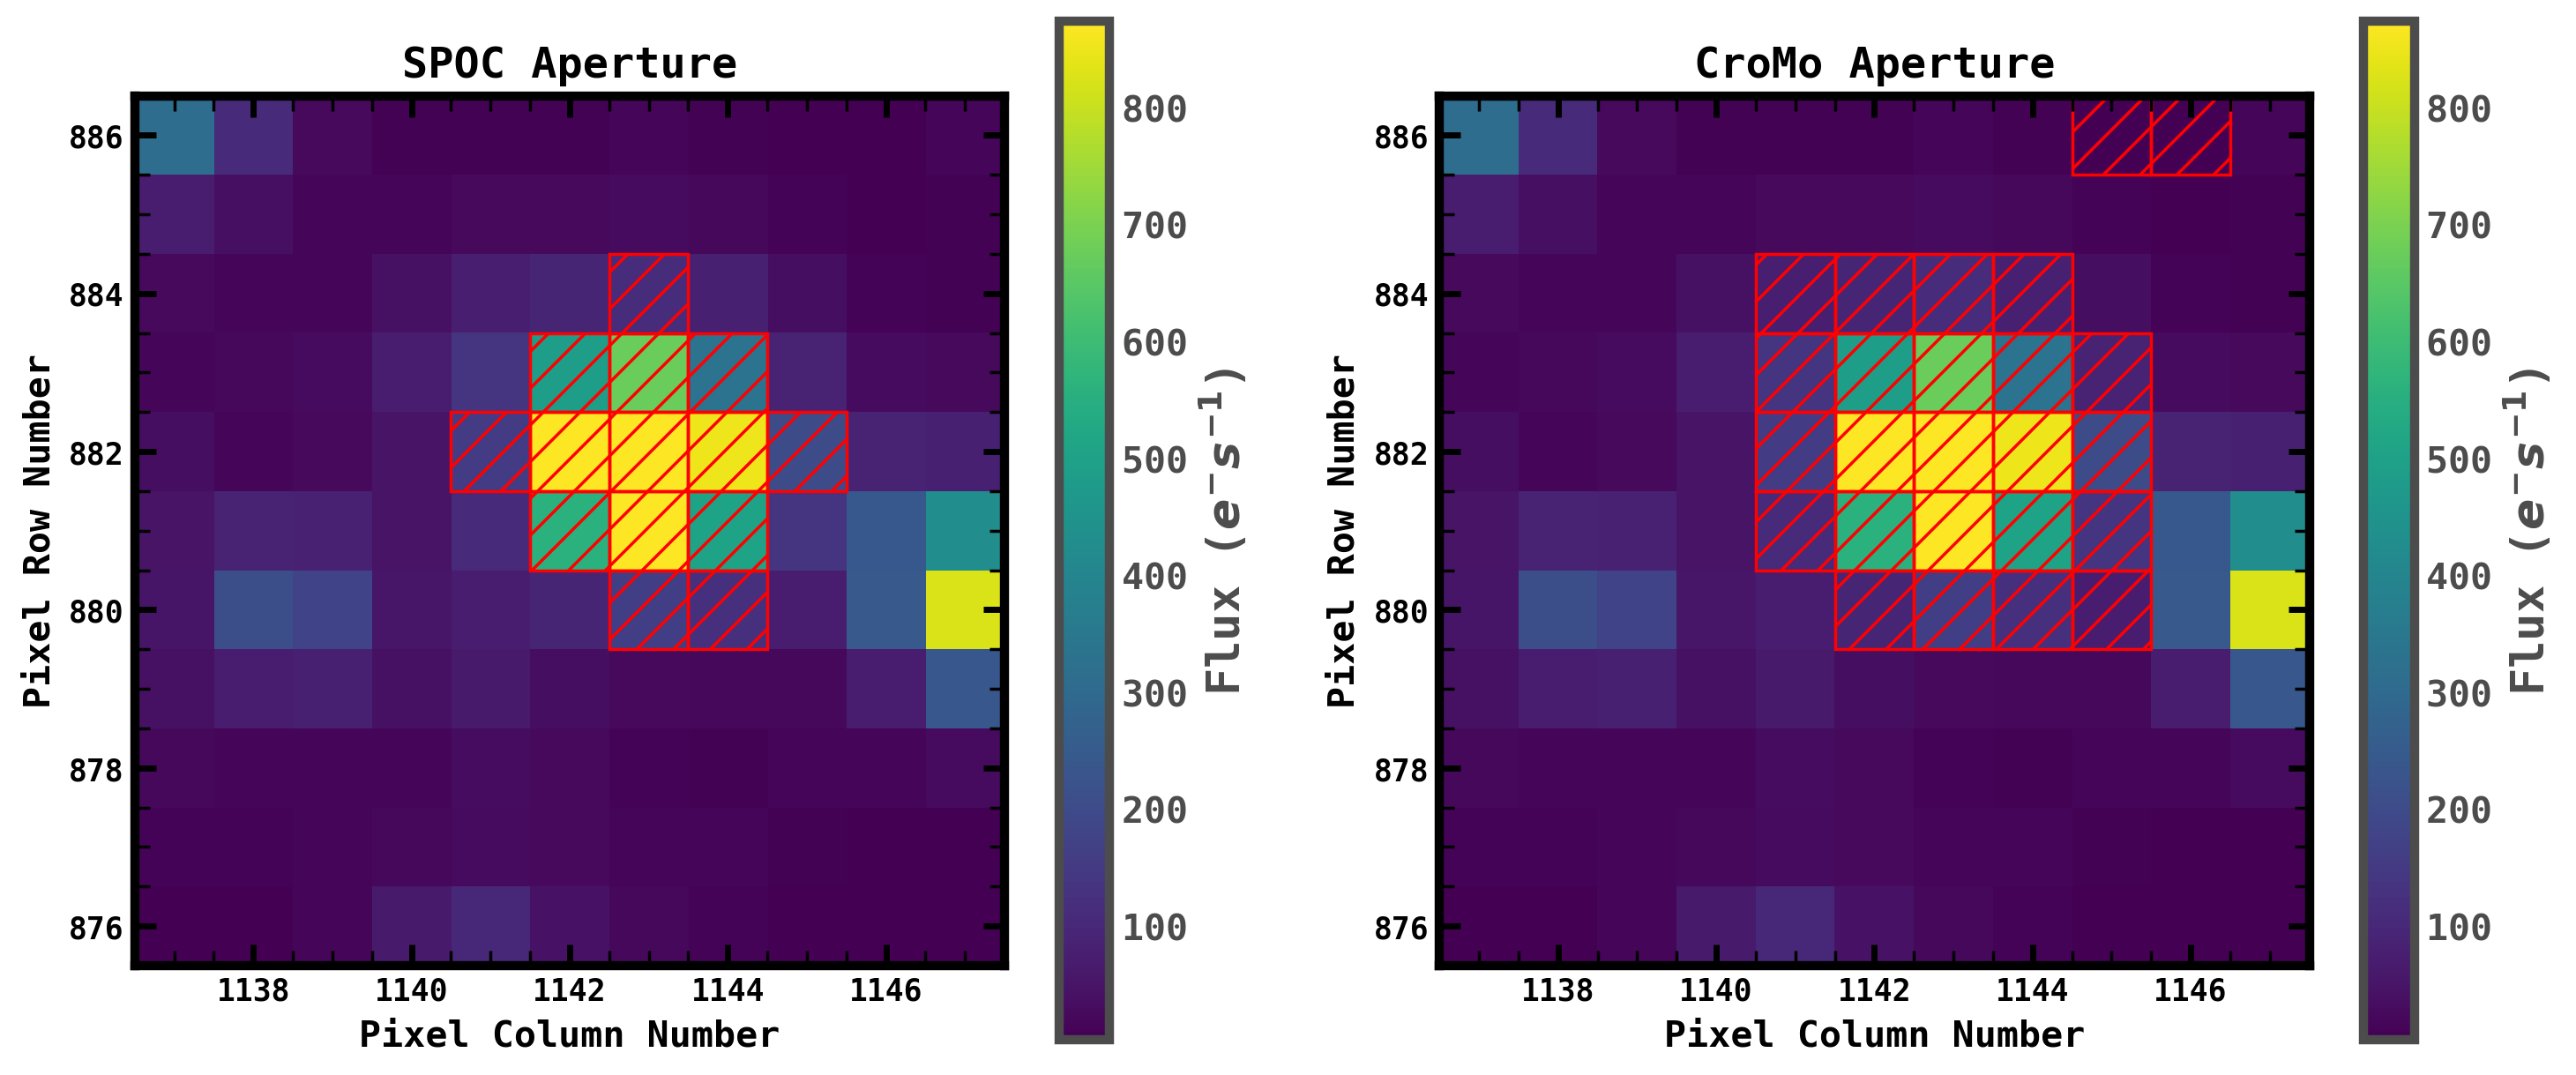

In [9]:
cromo_source_aperture, cromo_bkg_aperture = TESSCrowd.get_optimal_aperture(dx=dx, dy=dy)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
tpf.plot(ax=axes[0], aperture_mask=tpf.pipeline_mask, )
tpf.plot(ax=axes[1], aperture_mask=cromo_source_aperture)

axes[0].set_title('SPOC Aperture', fontsize=14)
axes[1].set_title('CroMo Aperture', fontsize=14)